In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.shape

(918, 12)

In [3]:
df.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
des = df.describe()
des

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


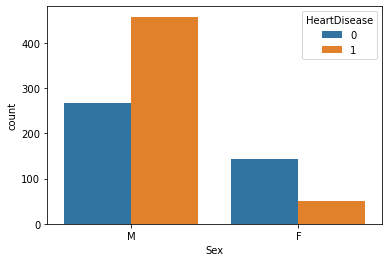

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


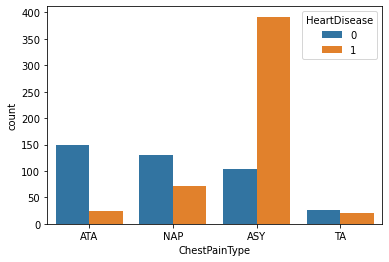

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


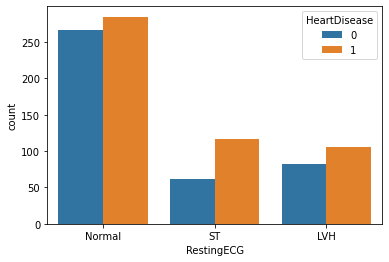

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


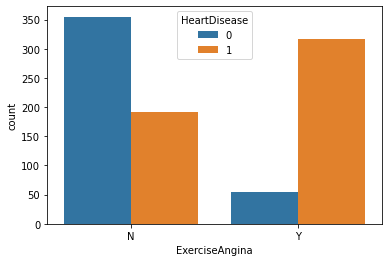

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


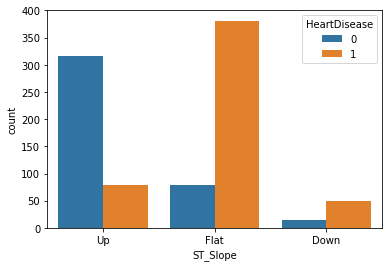

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


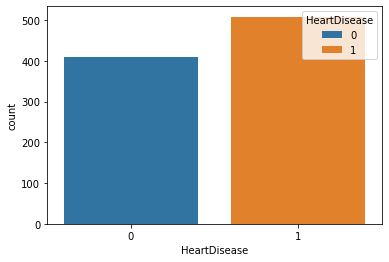

In [5]:
for column in df.columns:
    if(df[column].dtype=='object'):
        sns.countplot(df[column],hue=df['HeartDisease'])
        plt.show()
sns.countplot(df['FastingBS'],hue=df['HeartDisease'])
sns.countplot(df['HeartDisease'])
plt.show()

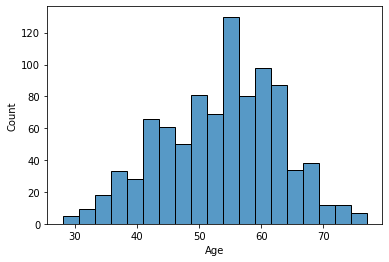

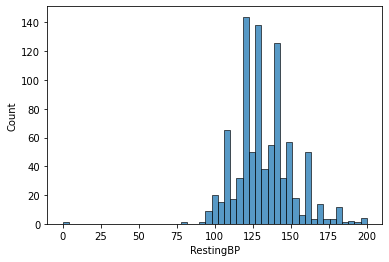

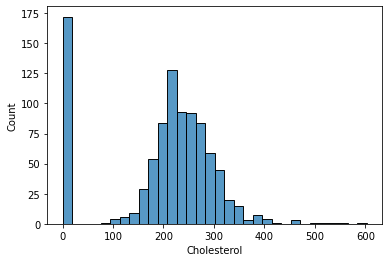

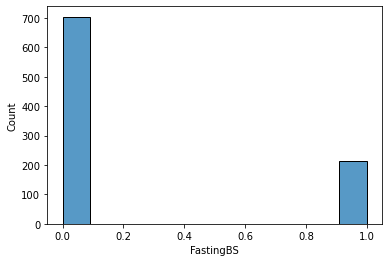

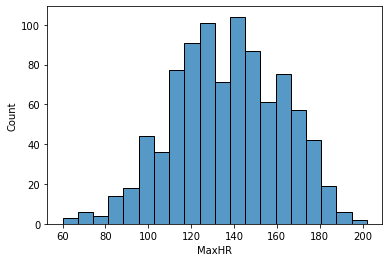

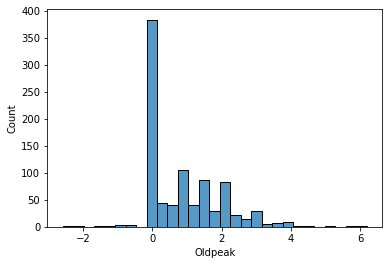

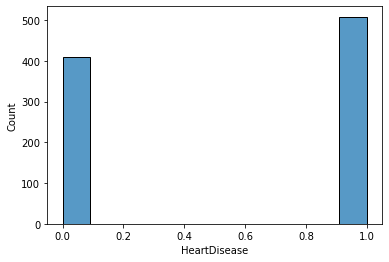

In [6]:
for column in df.columns:
    if((df[column].dtype=='int64') | (df[column].dtype=='float64')):
        sns.histplot(df[column])
        plt.show()

 ## Outlier Detection

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
out = des.loc[['mean' , 'std']]
out

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414


### Outlier- 1 : RestingBP

In [9]:
threshold = 3
outlier_1 = []
for i in df.RestingBP:
    Z = (i - out.RestingBP['mean'])/out.RestingBP['std']
    if Z > threshold or Z < -3:
        outlier_1.append(i)
        
print(outlier_1)

[190, 200, 200, 200, 0, 190, 200, 192]


In [10]:
outlier_1_indices = []
for i in range(0, len(df.RestingBP)):
    if (df.RestingBP[i] in outlier_1):
        outlier_1_indices.append(i)
        
print(outlier_1_indices)

[109, 241, 365, 399, 449, 592, 732, 759]


### Outlier- 2 : Cholesterol

In [11]:
threshold = 3
outlier_2 = []
for i in df.Cholesterol:
    Z = (i - out.Cholesterol['mean'])/out.Cholesterol['std']
    if Z > threshold or Z < -3:
        outlier_2.append(i)
        
print(outlier_2)

[529, 603, 564]


In [12]:
outlier_2_indices = []
for i in range(0, len(df.Cholesterol)):
    if (df.Cholesterol[i] in outlier_2):
        outlier_2_indices.append(i)
        
print(outlier_2_indices)

[76, 149, 616]


### Outlier- 3 : FastingBS

In [13]:
threshold = 3
outlier_3 = []
for i in df.FastingBS:
    Z = (i - out.FastingBS['mean'])/out.FastingBS['std']
    if Z > threshold:
        outlier_3.append(i)
        
print(outlier_3)

[]


In [14]:
outlier_3_indices = []
for i in range(0, len(df.FastingBS)):
    if (df.FastingBS[i] in outlier_3):
        outlier_3_indices.append(i)
        
print(outlier_3_indices)

[]


### Outlier- 4 : MaxHR

In [15]:
threshold = 3
outlier_4 = []
for i in df.MaxHR:
    Z = (i - out.MaxHR['mean'])/out.MaxHR['std']
    if Z > threshold:
        outlier_4.append(i)
        
print(outlier_4)

[]


In [16]:
outlier_4_indices = []
for i in range(0, len(df.MaxHR)):
    if (df.MaxHR[i] in outlier_4):
        outlier_4_indices.append(i)
        
print(outlier_4_indices)

[]


### Outlier- 5 : Oldpeak

In [17]:
threshold = 3
outlier_5 = []
for i in df.Oldpeak:
    Z = (i - out.Oldpeak['mean'])/out.Oldpeak['std']
    if Z > threshold or Z < -3:
        outlier_5.append(i)
        
print(outlier_5)

[5.0, -2.6, 4.2, 5.6, 4.2, 6.2, 4.4]


In [18]:
outlier_5_indices = []
for i in range(0, len(df.Oldpeak)):
    if (df.Oldpeak[i] in outlier_5):
        outlier_5_indices.append(i)
        
print(outlier_5_indices)

[166, 324, 702, 771, 791, 850, 900]


### Outlier- 6 : HeartDisease

In [19]:
threshold = 3
outlier_6 = []
for i in df.HeartDisease:
    Z = (i - out.HeartDisease['mean'])/out.HeartDisease['std']
    if Z > threshold:
        outlier_6.append(i)
        
print(outlier_6)

[]


In [20]:
outlier_6_indices = []
for i in range(0, len(df.HeartDisease)):
    if (df.HeartDisease[i] in outlier_6):
        outlier_6_indices.append(i)
        
print(outlier_6_indices)

[]


In [21]:
import itertools
final_outlier_indices = itertools.chain(outlier_1_indices, outlier_2_indices, outlier_3_indices, outlier_4_indices, outlier_5_indices, outlier_6_indices)
final_outlier_indices = list(final_outlier_indices)
final_outlier_indices

[109,
 241,
 365,
 399,
 449,
 592,
 732,
 759,
 76,
 149,
 616,
 166,
 324,
 702,
 771,
 791,
 850,
 900]

In [22]:
np.unique(final_outlier_indices) #To remove if any indice is picked up more than once.

array([ 76, 109, 149, 166, 241, 324, 365, 399, 449, 592, 616, 702, 732,
       759, 771, 791, 850, 900])

In [23]:
len(final_outlier_indices)

18

### Dropping outlier indexed elements

In [24]:
newdf = df.drop(final_outlier_indices)
newdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
newdf.shape

(900, 12)

In [26]:
newdf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,53.494444,132.036667,197.785556,0.232222,136.832222,0.860556,0.547778
std,9.451178,17.113434,107.301347,0.422485,25.472000,1.007475,0.497989
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


## Label Encoding

In [27]:
newdf.ChestPainType.unique() , newdf.RestingECG.unique() , newdf.ExerciseAngina.unique() , newdf.ST_Slope.unique()

(array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 array(['Normal', 'ST', 'LVH'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Up', 'Flat', 'Down'], dtype=object))

### Replacing text with numbers

In [101]:
newdf = newdf.copy()

newdf.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 3,
        'LVH': 2
    },
    inplace=True)

newdf.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

newdf.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 0
    },
    inplace=True
)

newdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


### Dropping our target column

In [102]:
newdf_ = newdf.drop("HeartDisease", axis = 'columns')
newdf_.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,0,0.0,3
1,49,F,NAP,160,180,0,1,156,0,1.0,2
2,37,M,ATA,130,283,0,2,98,0,0.0,3
3,48,F,ASY,138,214,0,1,108,1,1.5,2
4,54,M,NAP,150,195,0,1,122,0,0.0,3


### Converting remaining text via dummies

In [103]:
finaldf = pd.get_dummies(newdf_, drop_first=True)
finaldf.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [104]:
X = finaldf
Y = newdf.HeartDisease
X.head() 

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [105]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

## Scaling Elements

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42859937,  0.46558517,  0.85055001, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       [-0.47580769,  1.6349075 , -0.16584549, ..., -0.4843221 ,
         1.87082869, -0.22941573],
       [-1.7461966 , -0.11907599,  0.79460163, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       ...,
       [ 0.37111824, -0.11907599, -0.62275723, ..., -0.4843221 ,
        -0.53452248, -0.22941573],
       [ 0.37111824, -0.11907599,  0.35633935, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       [-1.64033085,  0.34865294, -0.21246914, ..., -0.4843221 ,
         1.87082869, -0.22941573]])

## Splitting our dataset

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=30)

In [108]:
X_train.shape , X_test.shape

((720, 13), (180, 13))

## Finding Scores of Models by various techniques

In [109]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model_params = {
    'SVM': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear'],
            'gamma': ['scale', 'auto'],
            'degree': [3, 5, 7]
        }  
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive Bayes Gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
            
        }
    }
}


### Finding Scores of models using GridSearchCV>

In [111]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 60, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
result_df

,model,best_score,best_params
0,SVM,0.861111,"{'C': 10, 'degree': 3, 'gamma': 'scale', 'kern..."
1,Random Forest,0.843056,{'n_estimators': 5}
2,Logistic Regression,0.855556,{'C': 5}
3,Naive Bayes Gaussian,0.845833,{}
4,Decision Tree,0.787500,{'criterion': 'entropy'}
5,KNN,0.869444,{'n_neighbors': 17}


In [112]:

grid_scores = clf.cv_results_
pd.DataFrame(grid_scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001256,0.000279,0.001649,0.000285,3,{'n_neighbors': 3},0.833333,0.750000,0.666667,0.916667,...,0.916667,0.833333,1.0,0.750000,0.916667,0.833333,0.916667,0.852778,0.083841,13
1,0.001279,0.000206,0.001713,0.000391,4,{'n_neighbors': 4},0.916667,0.833333,0.666667,0.916667,...,0.916667,0.833333,1.0,0.750000,0.916667,0.916667,0.916667,0.847222,0.086290,16
2,0.001287,0.000228,0.001708,0.000252,5,{'n_neighbors': 5},0.916667,0.833333,0.666667,0.833333,...,1.000000,0.750000,1.0,0.750000,0.916667,0.916667,0.916667,0.854167,0.088225,12
3,0.001249,0.000220,0.001658,0.000220,6,{'n_neighbors': 6},0.916667,0.750000,0.583333,0.833333,...,1.000000,0.833333,1.0,0.750000,0.833333,0.916667,0.916667,0.843056,0.091403,17
4,0.001304,0.000184,0.001753,0.000254,7,{'n_neighbors': 7},0.916667,0.833333,0.666667,0.833333,...,1.000000,0.833333,1.0,0.833333,0.833333,0.833333,0.916667,0.858333,0.085120,8
5,0.001704,0.000762,0.002797,0.003739,8,{'n_neighbors': 8},0.916667,0.833333,0.666667,0.833333,...,0.916667,0.916667,1.0,0.750000,0.833333,0.916667,0.916667,0.850000,0.081650,15
6,0.001583,0.000532,0.002156,0.001005,9,{'n_neighbors': 9},0.916667,0.833333,0.666667,0.833333,...,1.000000,0.916667,1.0,0.750000,0.833333,0.916667,0.916667,0.862500,0.085831,4
7,0.001498,0.000256,0.001991,0.000254,10,{'n_neighbors': 10},0.916667,0.833333,0.666667,0.833333,...,0.916667,0.916667,1.0,0.750000,0.833333,0.916667,0.916667,0.852778,0.087885,14
8,0.001569,0.000335,0.002132,0.000434,11,{'n_neighbors': 11},0.916667,0.833333,0.666667,0.833333,...,1.000000,0.916667,1.0,0.750000,0.833333,0.833333,0.916667,0.856944,0.086189,10
9,0.001357,0.000231,0.001892,0.000322,12,{'n_neighbors': 12},0.916667,0.833333,0.750000,0.833333,...,1.000000,0.916667,1.0,0.750000,0.833333,1.000000,0.916667,0.854167,0.088225,11


In [113]:
result_df["model"][5] , result_df["best_params"][5]

('KNN', {'n_neighbors': 17})

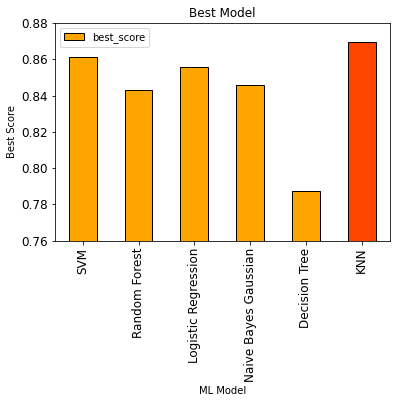

In [114]:
maxx = result_df['best_score'][0]

for i in result_df['best_score']:
    if i > maxx:
        maxx = i
colors = []
for i in range(0, len(result_df['best_score'])):
    if result_df['best_score'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

result_df.plot(x = "model" , y = "best_score" , kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "Best Score", ylim = (0.76, 0.88), fontsize = 12, color = colors, edgecolor = "black")

In [115]:
finaldf

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


### Finding Scores of models using cross_val_score

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [45]:
logreg_scores = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_scaled, Y, cv = 60)
logreg_scores_avg = np.average(logreg_scores)
logreg_scores_avg

0.8522222222222222

In [46]:
dectree_scores = cross_val_score(DecisionTreeClassifier(), X_scaled, Y, cv = 60)
dectree_scores_avg = np.average(dectree_scores)
dectree_scores_avg

0.7788888888888889

In [47]:
from sklearn.svm import SVC
svm_scores = cross_val_score(SVC(), X_scaled, Y, cv = 60)
svm_scores_avg = np.average(svm_scores)
svm_scores_avg

0.861111111111111

In [48]:
ranfor_scores = cross_val_score(RandomForestClassifier(n_estimators = 80), X_scaled, Y, cv = 60)
ranfor_scores_avg = np.average(ranfor_scores)
ranfor_scores_avg

0.8622222222222222

In [49]:
naivegauss_scores = cross_val_score(GaussianNB(), X_scaled, Y, cv = 60)
naivegauss_scores_avg = np.average(naivegauss_scores)
naivegauss_scores_avg

0.8411111111111111

In [50]:
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors = 15), X_scaled, Y, cv = 60)
knn_scores_avg = np.average(knn_scores)
knn_scores_avg

0.8544444444444443

In [51]:
scores = {'model scores': [svm_scores_avg, ranfor_scores_avg, logreg_scores_avg, naivegauss_scores_avg, dectree_scores_avg, knn_scores_avg] , 'model': ["SVM", "Random Forest", "Logistic Regression", "Naive Bayes Gaussian", "Decision Tree", "KNN"]}

cross_val_score_df = pd.DataFrame(scores, columns=[ 'model' , 'model scores'])
cross_val_score_df

,model,model scores
0,SVM,0.861111
1,Random Forest,0.862222
2,Logistic Regression,0.852222
3,Naive Bayes Gaussian,0.841111
4,Decision Tree,0.778889
5,KNN,0.854444


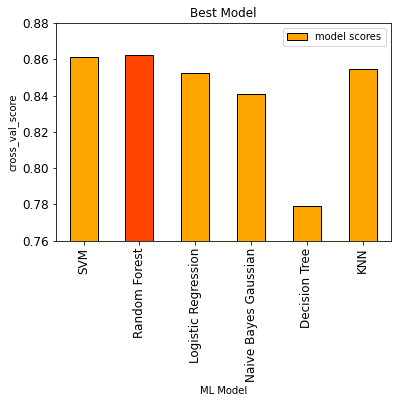

In [52]:
maxx = cross_val_score_df['model scores'][0]

for i in cross_val_score_df['model scores']:
    if i > maxx:
        maxx = i
colors = []
for i in range(0, len(cross_val_score_df['model scores'])):
    if cross_val_score_df['model scores'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

cross_val_score_df.plot(x = "model" , y = "model scores" , kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "cross_val_score", ylim = (0.76, 0.88), fontsize = 12, color = colors, edgecolor = "black")

### Finding Scores of models using roc_auc_score

In [53]:
logreg_scores_roc = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_scaled, Y, scoring='roc_auc', cv = 60)
logreg_scores_roc_avg = np.average(logreg_scores_roc)
logreg_scores_roc_avg

0.9202821869488538

In [54]:
dectree_scores_roc = cross_val_score(DecisionTreeClassifier(), X_scaled, Y, scoring='roc_auc', cv = 60)
dectree_scores_roc_avg = np.average(dectree_scores_roc)
dectree_scores_roc_avg

0.7819444444444446

In [55]:
svm_scores_roc = cross_val_score(SVC(), X_scaled, Y, scoring='roc_auc', cv = 60)
svm_scores_roc_avg = np.average(svm_scores_roc)
svm_scores_roc_avg

0.9253086419753089

In [56]:
ranfor_scores_roc = cross_val_score(RandomForestClassifier(n_estimators = 80), X_scaled, Y, scoring='roc_auc', cv = 60)
ranfor_scores_roc_avg = np.average(ranfor_scores_roc)
ranfor_scores_roc_avg

0.926664462081129

In [57]:
naivegauss_scores_roc = cross_val_score(GaussianNB(), X_scaled, Y, scoring = 'roc_auc', cv = 60)
naivegauss_scores_roc_avg = np.average(naivegauss_scores_roc)
naivegauss_scores_roc_avg

0.9199625220458555

In [58]:
knn_scores_roc = cross_val_score(KNeighborsClassifier(n_neighbors = 20), X_scaled, Y, scoring='roc_auc', cv = 60)
knn_scores_roc_avg = np.average(knn_scores_roc)
knn_scores_roc_avg

0.9303350970017638

In [59]:
scores = {'model scores': [svm_scores_roc_avg, ranfor_scores_roc_avg, logreg_scores_roc_avg, naivegauss_scores_roc_avg, dectree_scores_roc_avg, knn_scores_roc_avg] , 'model': ["SVM", "Random Forest", "Logistic Regression", "Naive Bayes Gaussian", "Decision Tree", "KNN"]}

roc_auc_score_df = pd.DataFrame(scores, columns=[ 'model' , 'model scores'])
roc_auc_score_df

,model,model scores
0,SVM,0.925309
1,Random Forest,0.926664
2,Logistic Regression,0.920282
3,Naive Bayes Gaussian,0.919963
4,Decision Tree,0.781944
5,KNN,0.930335


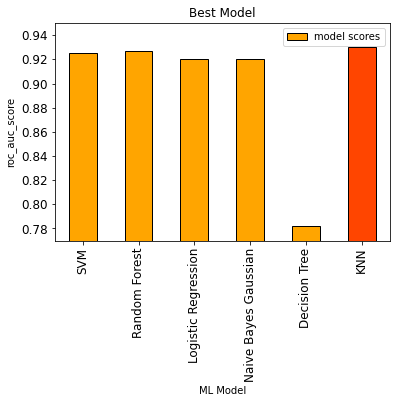

In [60]:
maxx = roc_auc_score_df['model scores'][0]

for i in roc_auc_score_df['model scores']:
    if i > maxx:
        maxx = i
colors = []
for i in range(0, len(roc_auc_score_df['model scores'])):
    if roc_auc_score_df['model scores'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

roc_auc_score_df.plot(x = "model" , y = "model scores" , kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "roc_auc_score", ylim = (0.77, 0.95), fontsize = 12, color = colors, edgecolor = "black")

## Training Models Independently

### Support Vector Machine

In [61]:
from sklearn.svm import SVC

svm_model = SVC(C = 10, degree = 3, gamma = 'scale', kernel = 'linear')
svm_model.fit(X_train, Y_train)

SVC(C=10, kernel='linear')

In [62]:
svm_model_score = svm_model.score(X_test, Y_test)
svm_model_score 

0.8333333333333334

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

ranfor_model = RandomForestClassifier(n_estimators = 10)
ranfor_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [64]:
ranfor_model_score = ranfor_model.score(X_test, Y_test)
ranfor_model_score

0.8666666666666667

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C = 5)
logreg_model.fit(X_train, Y_train)

LogisticRegression(C=5)

In [66]:
logreg_model_score = logreg_model.score(X_test, Y_test)
logreg_model_score

0.85

<### Naive Bayes Gaussian

In [67]:
from sklearn.naive_bayes import GaussianNB

naivegauss_model = GaussianNB()
naivegauss_model.fit(X_train, Y_train)

GaussianNB()

In [68]:
naivegauss_model_score = naivegauss_model.score(X_test, Y_test)
naivegauss_model_score

0.8277777777777777

### Decision Tree

In [69]:
from sklearn import tree

dectree_model = tree.DecisionTreeClassifier(criterion = 'gini')
dectree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [70]:
dectree_model_score = dectree_model.score(X_test, Y_test)
dectree_model_score

0.7944444444444444

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 17)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
knn_model_score = knn_model.score(X_test, Y_test)
knn_model_score

0.8277777777777777

In [73]:
scores = {'model scores': [svm_model_score, ranfor_model_score, logreg_model_score, naivegauss_model_score, dectree_model_score, knn_model_score] , 'model': ["SVM", "Random Forest", "Logistic Regression", "Naive Bayes Gaussian", "Decision Tree", "KNN"]}

score_df = pd.DataFrame(scores, columns=[ 'model' , 'model scores'])
score_df

,model,model scores
0,SVM,0.833333
1,Random Forest,0.866667
2,Logistic Regression,0.850000
3,Naive Bayes Gaussian,0.827778
4,Decision Tree,0.794444
5,KNN,0.827778


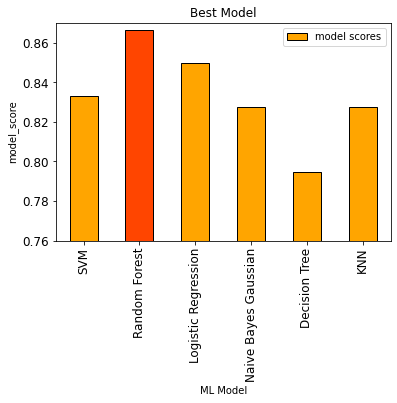

In [116]:
maxx = score_df['model scores'][0]

for i in score_df['model scores']:
    if i > maxx:
        maxx = i
colors = []
for i in range(0, len(score_df['model scores'])):
    if score_df['model scores'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

score_df.plot(x = "model" , y = "model scores" , kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "model_score", ylim = (0.76, 0.87), fontsize = 12, color = colors, edgecolor = "black")

## Confusion Matrices of Models

In [75]:
from sklearn.metrics import confusion_matrix

### Support Vector Machine

In [76]:
Y_predicted_svm = svm_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_svm)
cm

array([[65, 22],
       [ 8, 85]])

Text(42.0, 0.5, 'Truth')

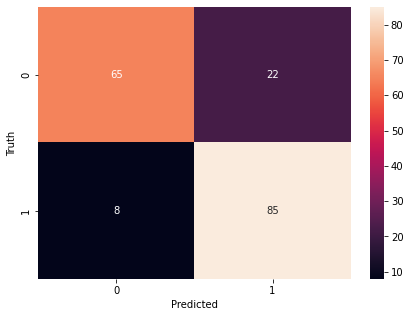

In [77]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest

In [78]:
Y_predicted_ranfor = ranfor_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_ranfor)
cm

array([[72, 15],
       [ 9, 84]])

Text(42.0, 0.5, 'Truth')

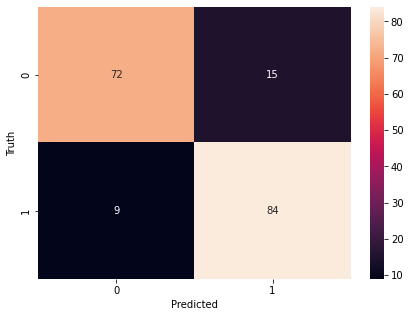

In [79]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Logistic Regression

In [80]:
Y_predicted_logreg = logreg_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_logreg)
cm

array([[68, 19],
       [ 8, 85]])

Text(42.0, 0.5, 'Truth')

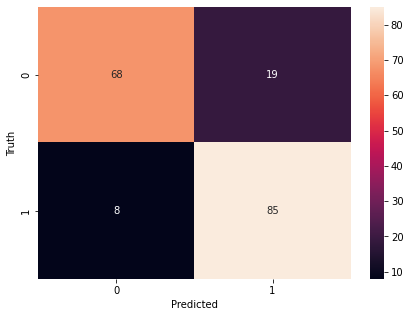

In [81]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Naive Bayes Gaussian

In [82]:
Y_predicted_naivegauss = naivegauss_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_naivegauss)
cm

array([[70, 17],
       [14, 79]])

Text(42.0, 0.5, 'Truth')

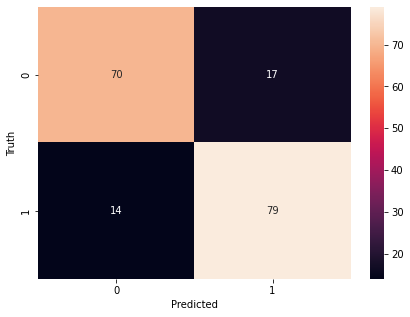

In [83]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

In [84]:
Y_predicted_dectree = dectree_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_dectree)
cm

array([[64, 23],
       [14, 79]])

Text(42.0, 0.5, 'Truth')

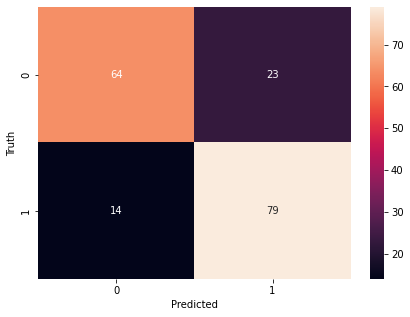

In [85]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### KNN

In [86]:
Y_predicted_knn = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_knn)
cm

array([[69, 18],
       [13, 80]])

Text(42.0, 0.5, 'Truth')

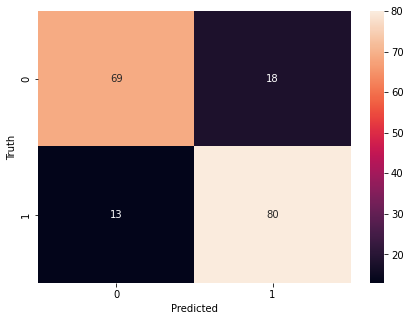

In [87]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Classification Reports of Models

In [88]:
from sklearn.metrics import classification_report

### Support Vector Machine

In [89]:
print(classification_report(Y_test, Y_predicted_svm, labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.89      0.75      0.81        87
         Has a heart disease(1)       0.79      0.91      0.85        93

                       accuracy                           0.83       180
                      macro avg       0.84      0.83      0.83       180
                   weighted avg       0.84      0.83      0.83       180



### Random Forest>

In [90]:
print(classification_report(Y_test, Y_predicted_ranfor , labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.89      0.83      0.86        87
         Has a heart disease(1)       0.85      0.90      0.88        93

                       accuracy                           0.87       180
                      macro avg       0.87      0.87      0.87       180
                   weighted avg       0.87      0.87      0.87       180



### Logistic Regression

In [91]:
print(classification_report(Y_test, Y_predicted_logreg , labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.89      0.78      0.83        87
         Has a heart disease(1)       0.82      0.91      0.86        93

                       accuracy                           0.85       180
                      macro avg       0.86      0.85      0.85       180
                   weighted avg       0.85      0.85      0.85       180



### Naive Bayes Gaussian

In [92]:
print(classification_report(Y_test, Y_predicted_naivegauss , labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.83      0.80      0.82        87
         Has a heart disease(1)       0.82      0.85      0.84        93

                       accuracy                           0.83       180
                      macro avg       0.83      0.83      0.83       180
                   weighted avg       0.83      0.83      0.83       180



### Decision Tree

In [93]:
print(classification_report(Y_test, Y_predicted_dectree , labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.82      0.74      0.78        87
         Has a heart disease(1)       0.77      0.85      0.81        93

                       accuracy                           0.79       180
                      macro avg       0.80      0.79      0.79       180
                   weighted avg       0.80      0.79      0.79       180



<font size = "3"> **KNN** </font>

In [94]:
print(classification_report(Y_test, Y_predicted_knn , labels = [0, 1], target_names = ["Doesn't have a heart disease(0)", "Has a heart disease(1)"]))

                                 precision    recall  f1-score   support

Doesn't have a heart disease(0)       0.84      0.79      0.82        87
         Has a heart disease(1)       0.82      0.86      0.84        93

                       accuracy                           0.83       180
                      macro avg       0.83      0.83      0.83       180
                   weighted avg       0.83      0.83      0.83       180

